In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Importing data from House Sales csv file into a panda dataframe
df = pd.read_csv('House Sales Values.csv')

#Having a look at first 10 rows of our dataset
print ("Print first 10 rows of dataset")
print (df.head(10))

Print first 10 rows of dataset
   YearBuilt  SquareFootage HouseType  NumCarGarage Fireplaces Pool  SalePrice
0       2002           3201      Semi           4.0        Yes   No  2000000.0
1       2017           3150      Semi           3.0        Yes   No  2000000.0
2       2000           2455  Detached           3.0         No   No   400000.0
3       2006           2560      Semi           4.0        Yes   No   400000.0
4       2005           3415       NaN           2.0         No  Yes  2000000.0
5       2015           3654      Town           3.0         No   No  2000000.0
6       2015           2071      Town           4.0         No   No   400000.0
7       2004           1310      Town           1.0        Yes  Yes   750000.0
8       2019           2646  Detached           1.0         No   No   400000.0
9       2001           1191      Town           2.0         No   No   750000.0


In [78]:
#Describing our dataset
print ("Descrbing our dataset")
print (df.describe())

Descrbing our dataset
         YearBuilt  SquareFootage  NumCarGarage     SalePrice
count  1000.000000    1000.000000    999.000000  9.950000e+02
mean   2009.567000    2484.388000      2.487487  1.025226e+06
std       5.934368     857.178259      1.142894  6.778931e+05
min    2000.000000    1000.000000      1.000000  4.000000e+05
25%    2004.000000    1771.250000      1.000000  4.000000e+05
50%    2009.000000    2466.500000      2.000000  7.500000e+05
75%    2015.000000    3229.250000      4.000000  2.000000e+06
max    2019.000000    3992.000000      4.000000  2.000000e+06


In [79]:
#Looking at shape of our dataframe
print ("Shape of our dataset")
print (df.shape)

Shape of our dataset
(1000, 7)


In [59]:
#Looking at data types in our data set
print ("Data types in our dataset")
print (df.dtypes)

Data types in our dataset
YearBuilt          int64
SquareFootage      int64
HouseType         object
NumCarGarage     float64
Fireplaces        object
Pool              object
SalePrice        float64
dtype: object


In [80]:
#find out total count of data 
total_count = df.isnull().sum().sort_values(ascending=False)

#find out percent missing data relative to full data set
percent_missing = (df.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_count, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
HouseType,10,0.010
Pool,6,0.006
SalePrice,5,0.005
Fireplaces,3,0.003
NumCarGarage,1,0.001
SquareFootage,0,0.000
YearBuilt,0,0.000


In [81]:
#Removing null values in our data set and re-checking shape
df.dropna(axis=0, inplace=True)

#Updated of our dataframe
print ("Updated shape of our dataset")
print (df.shape)

Updated shape of our dataset
(980, 7)


In [94]:
from sklearn.preprocessing import LabelEncoder

#get all categorical features
categorical_cols = ['HouseType','Fireplaces','Pool']
print('name of categorical features')
print(categorical_cols)
print("number of categorical features = ",len(categorical_cols))

#convert categorical variables into labels
labelEncoder = LabelEncoder()

#applying the label encoder to the categorical features
for categorical_col in categorical_cols:
    df[categorical_col] =  labelEncoder.fit_transform(df[categorical_col])
    
print("all categorical features converted successfully")

#Having a look at first 10 rows of our dataset
print ("Print first 10 rows of dataset")
print (df.head(10))

#Looking at data types in our data set
print ("Data types in our dataset")
print (df.dtypes)

name of categorical features
['HouseType', 'Fireplaces', 'Pool']
number of categorical features =  3
all categorical features converted successfully
Print first 10 rows of dataset
    YearBuilt  SquareFootage  HouseType  NumCarGarage  Fireplaces  Pool  \
0        2002           3201          1           4.0           1     0   
1        2017           3150          1           3.0           1     0   
2        2000           2455          0           3.0           0     0   
3        2006           2560          1           4.0           1     0   
5        2015           3654          2           3.0           0     0   
6        2015           2071          2           4.0           0     0   
7        2004           1310          2           1.0           1     1   
8        2019           2646          0           1.0           0     0   
9        2001           1191          2           2.0           0     0   
10       2016           3279          2           4.0           0     

In [51]:
#Import Numpy library
import numpy as np

#Import Scipy library
from scipy import stats

#Calculate z scores
z_scores = np.abs(stats.zscore(df))

#Narrow down data set to all columns with z scores of less than 3
df = df[(z_scores < 3).all(axis=1)]
print ("data frame with no outliers shape", df.shape)
print ("data frame with no outliers describe", df.describe())

data frame with no outliers shape (980, 7)
data frame with no outliers describe          YearBuilt  SquareFootage   HouseType  NumCarGarage  Fireplaces  \
count   980.000000     980.000000  980.000000    980.000000  980.000000   
mean   2009.425510    2490.789796    1.028571      2.497959    0.513265   
std       5.849977     868.731111    0.825537      1.108513    0.500079   
min    2000.000000    1007.000000    0.000000      1.000000    0.000000   
25%    2004.000000    1741.750000    0.000000      1.000000    0.000000   
50%    2009.000000    2493.500000    1.000000      3.000000    1.000000   
75%    2015.000000    3252.250000    2.000000      3.000000    1.000000   
max    2019.000000    3995.000000    2.000000      4.000000    1.000000   

             Pool     SalePrice  
count  980.000000  9.800000e+02  
mean     0.467347  1.151014e+06  
std      0.499187  4.930919e+05  
min      0.000000  3.004030e+05  
25%      0.000000  7.154208e+05  
50%      0.000000  1.159595e+06  
75%   

Overall Sale Price distribution


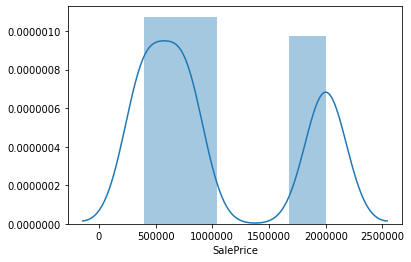

In [83]:
#let's visualize our data to look at how sale price is distributed
import matplotlib.pyplot as plt
import seaborn as sns

print ("Overall Sale Price distribution")
sns.distplot(df['SalePrice']);

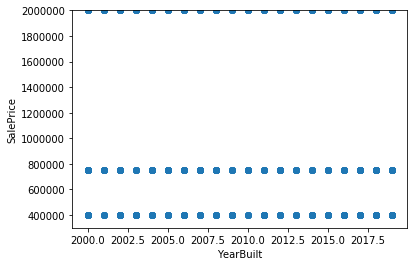

In [84]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

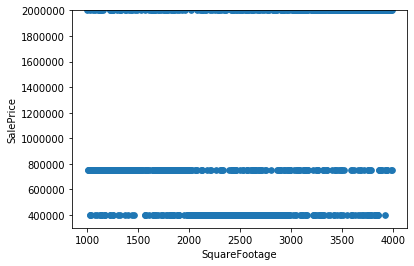

In [85]:
var = 'SquareFootage'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

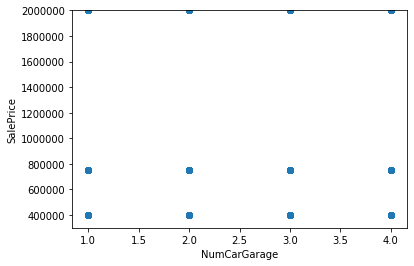

In [86]:
var = 'NumCarGarage'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

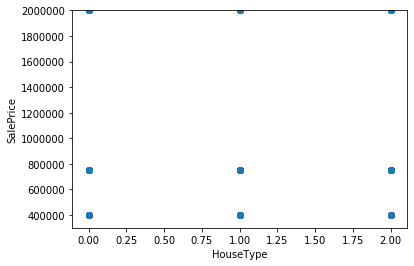

In [87]:
var = 'HouseType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

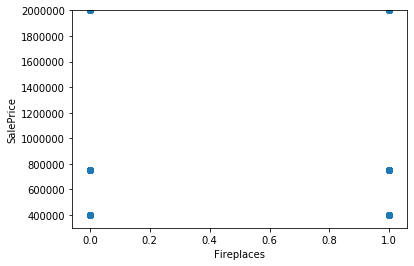

In [88]:
var = 'Fireplaces'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

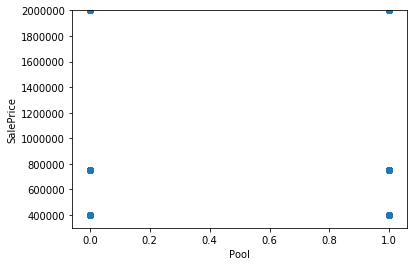

In [89]:
var = 'Pool'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(300000,2000000), s=32);

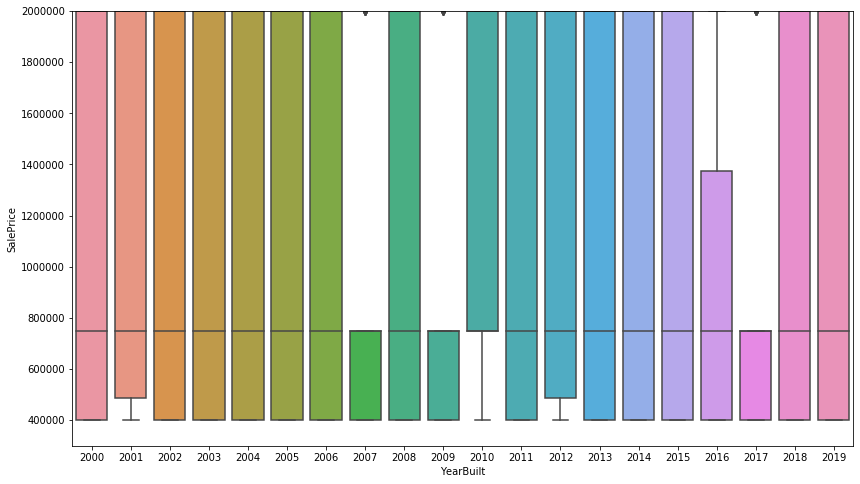

In [90]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=300000, ymax=2000000);

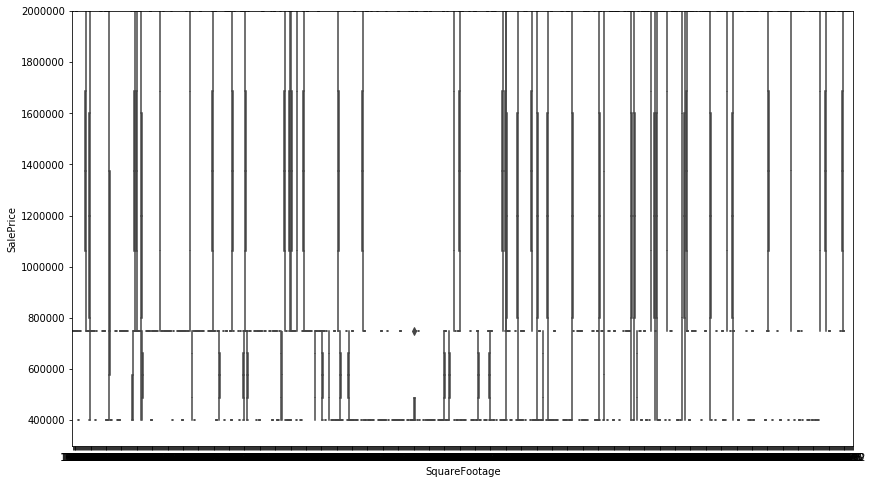

In [91]:
var = 'SquareFootage'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=300000, ymax=2000000);

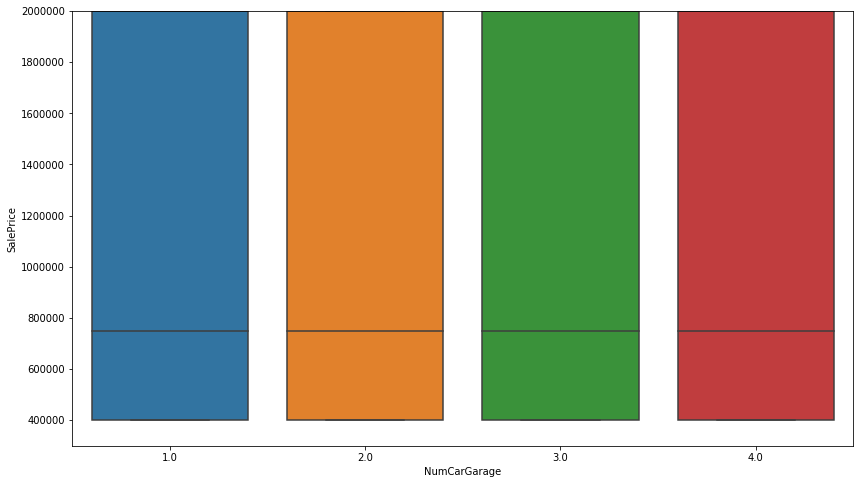

In [92]:
var = 'NumCarGarage'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=300000, ymax=2000000);

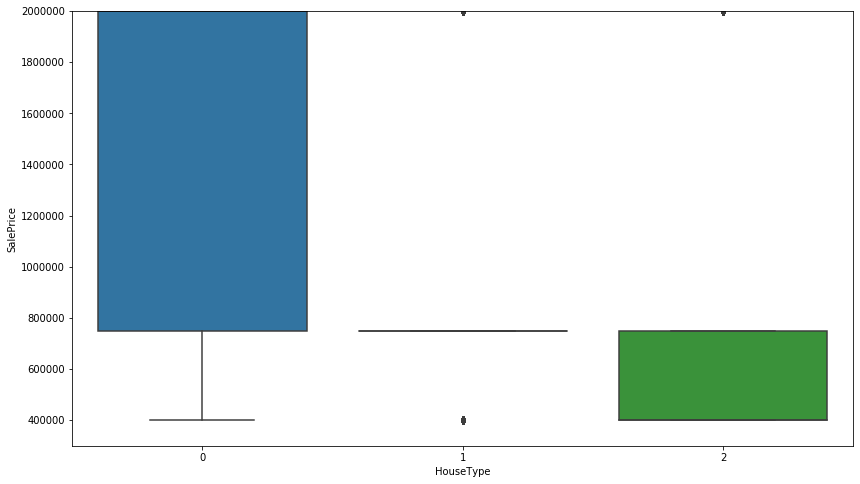

In [98]:
var = 'HouseType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=300000, ymax=2000000);

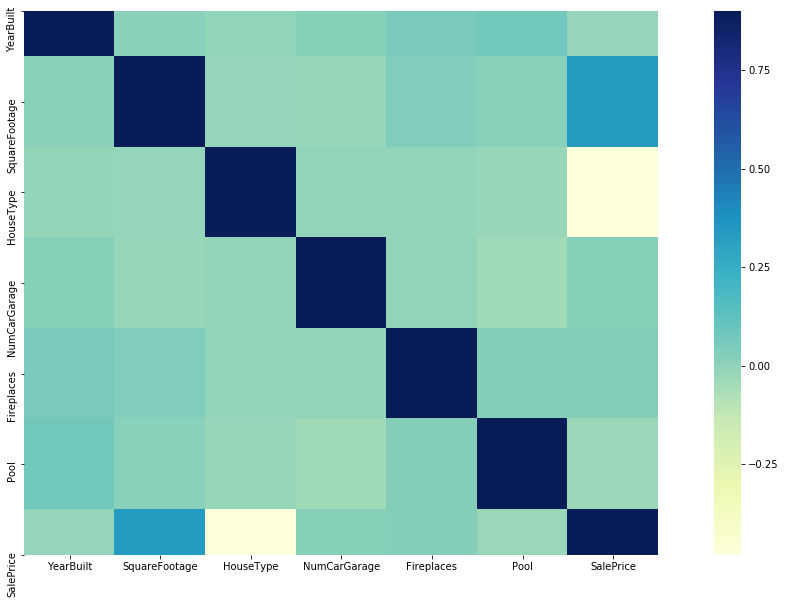

In [93]:
#correlation matrix
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", vmax=.9, square=True);

In [95]:
#Splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.50, random_state=80, shuffle =True)
print('Data split successfully in training and test data sets')

Data split successfully in training and test data sets


In [96]:
#Building and Testing Linear Regression Model
from sklearn.linear_model import LinearRegression

#Initializaing the Linear Regression Model
LR = LinearRegression(copy_X=True)
LR.fit(X_train,y_train)
print("Linear regression model trained successfully")

#Making a prediction using the test data in the Linear Regression Model
yhat = LR.predict(X_test)

#Two ways to measure the accuracy of the Linear Regression Model
#1) Mean Squared Error (MSE) that calculates the difference between actual and predicted values as follows
from sklearn.metrics import mean_squared_error
print ("Mean squared error of Linear Regression Model", mean_squared_error(y_test, yhat))

#2) R-squared also known as coefficient of determination that calculates how close is the data to the fitted regression line
print ("R squared error of Linear Regression Model on Training Data", LR.score (X_train, y_train))
print ("R squared error of Linear Regression Model on Testing Data", LR.score (X_test, y_test))

Linear regression model trained successfully
Mean squared error of Linear Regression Model 280817720691.3239
R squared error of Linear Regression Model on Training Data 0.2818905399647811
R squared error of Linear Regression Model on Testing Data 0.3881160275230543


In [97]:
from sklearn.tree import DecisionTreeRegressor 

# Initializing the Decision Tree Regression Model
saleTree = DecisionTreeRegressor(random_state = 100) 

# fit the regressor with X and Y data 
saleTree.fit(X_train, y_train) 
print("Decision tree regression model trained successfully")

#Making a prediction using the test data in the Decision Tree Regression Model
predTree = saleTree.predict(X_test)

from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision tree regression model trained successfully
DecisionTrees's Accuracy:  0.6693877551020408
